In [70]:
import pandas as pd#processing and manipulation
import numpy as np#linear algebra
import matplotlib.pyplot as plt#visulaization
import seaborn as sns#high visulas
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate#feature eng
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.decomposition import PCA#Principal Component Analysis
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,recall_score,accuracy_score,precision_score,f1_score,roc_curve,roc_auc_score#metrics of classification
from scipy.stats import ttest_ind #Statistical Test
import warnings
from sklearn.exceptions import FitFailedWarning
warnings.simplefilter('ignore', FitFailedWarning)

In [71]:
empdata=pd.read_csv("C:\\Users\\SuryaKrishna\\Desktop\\Technocolabs Software\\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [72]:
empdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [73]:
empdata.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [74]:
empdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


#DATA CLEANING

Statistical Analysis

In [75]:
mean_Age=empdata['Age'].mean()
empdata['Age'].fillna(mean_Age,inplace=True)

In [76]:
empdata.dropna(inplace=True)
empdata.drop_duplicates(inplace=True)

Outlier Detection and Treatment

In [77]:
Q1=empdata['MonthlyIncome'].quantile(0.25)
Q3=empdata['MonthlyIncome'].quantile(0.75)
IQR=Q3-Q1
empdata=empdata[(empdata['MonthlyIncome']>=Q1-1.5*IQR) & (empdata['MonthlyIncome']<=Q3+1.5*IQR)]

EDA

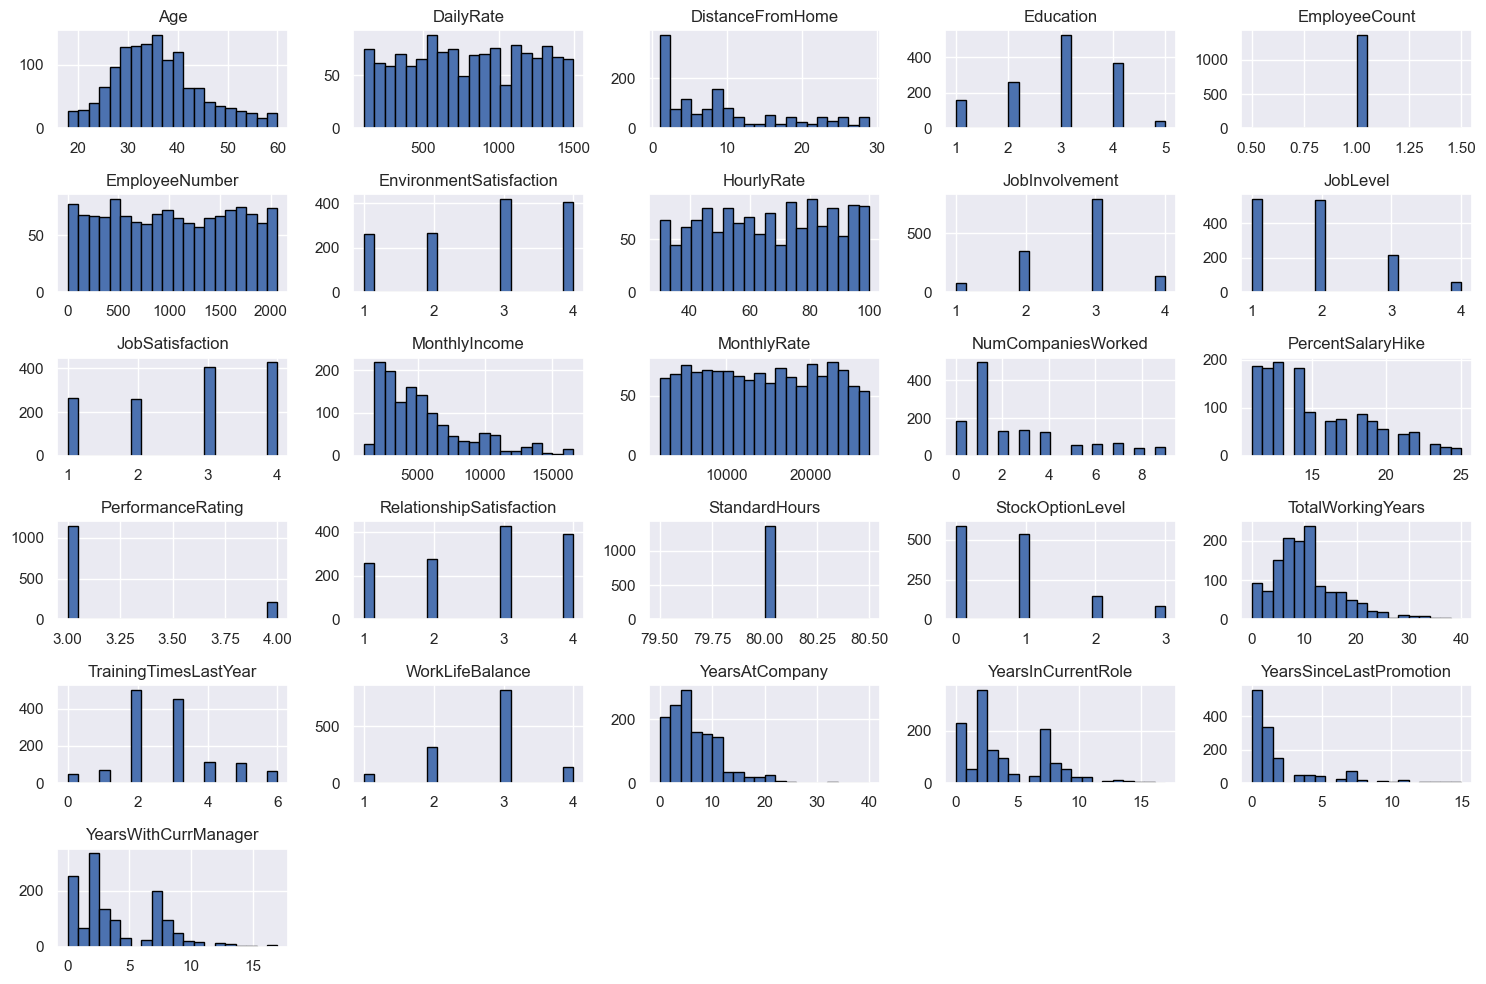

In [78]:
empdata.hist(figsize=(15,10),bins=20,edgecolor='black')#univariate analysis
plt.tight_layout()
plt.show()

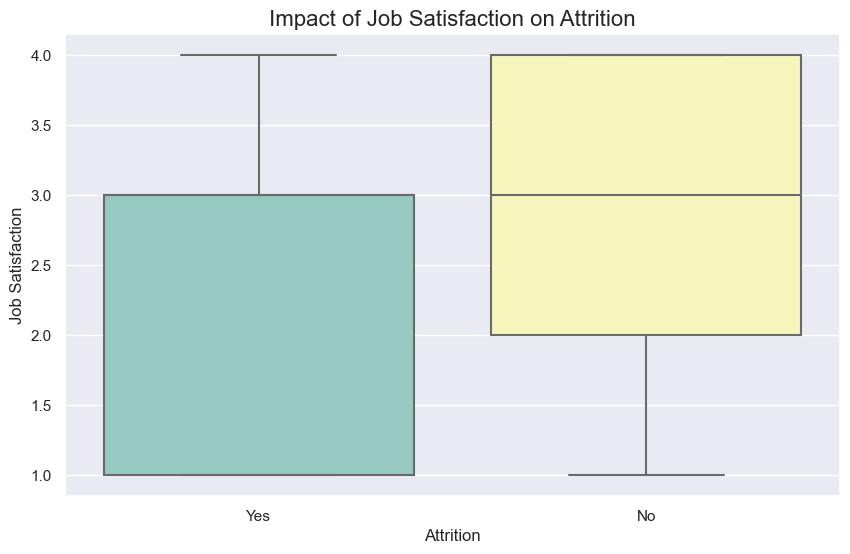

In [79]:
# Impact of job satisfaction on attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='JobSatisfaction', data=empdata, palette='Set3')
plt.title('Impact of Job Satisfaction on Attrition', fontsize=16)
plt.xlabel('Attrition')
plt.ylabel('Job Satisfaction')
plt.show()

#Distribution Plots and count Plots

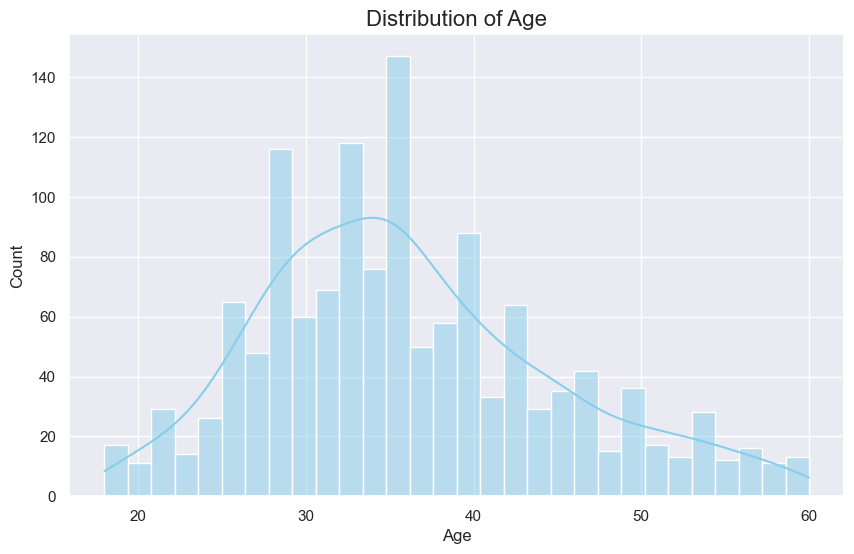

In [80]:
# Visualize distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(empdata['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age', fontsize=16)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

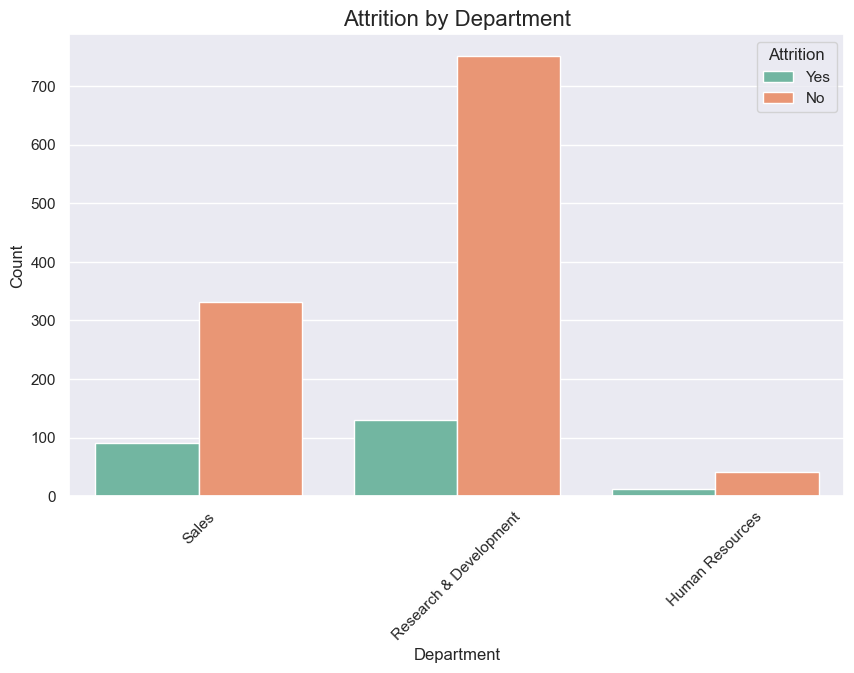

In [81]:
# Explore attrition by department
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=empdata, palette='Set2')
plt.title('Attrition by Department', fontsize=16)
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Descriptive Analytics

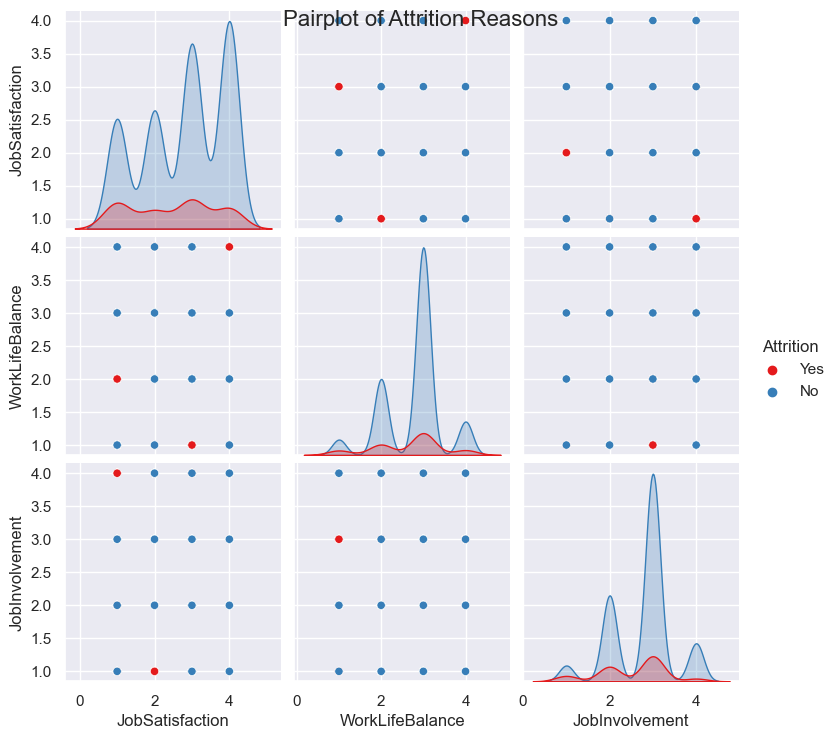

In [82]:
# Analyze reasons for attrition
attrition_reasons = empdata[['Attrition', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement']]
sns.pairplot(attrition_reasons, hue='Attrition', palette='Set1')
plt.suptitle('Pairplot of Attrition Reasons', fontsize=16)
plt.show()


C:\Users\SuryaKrishna\AppData\Local\Temp\ipykernel_284\395126558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=empdata.corr()


Correlation Matrix


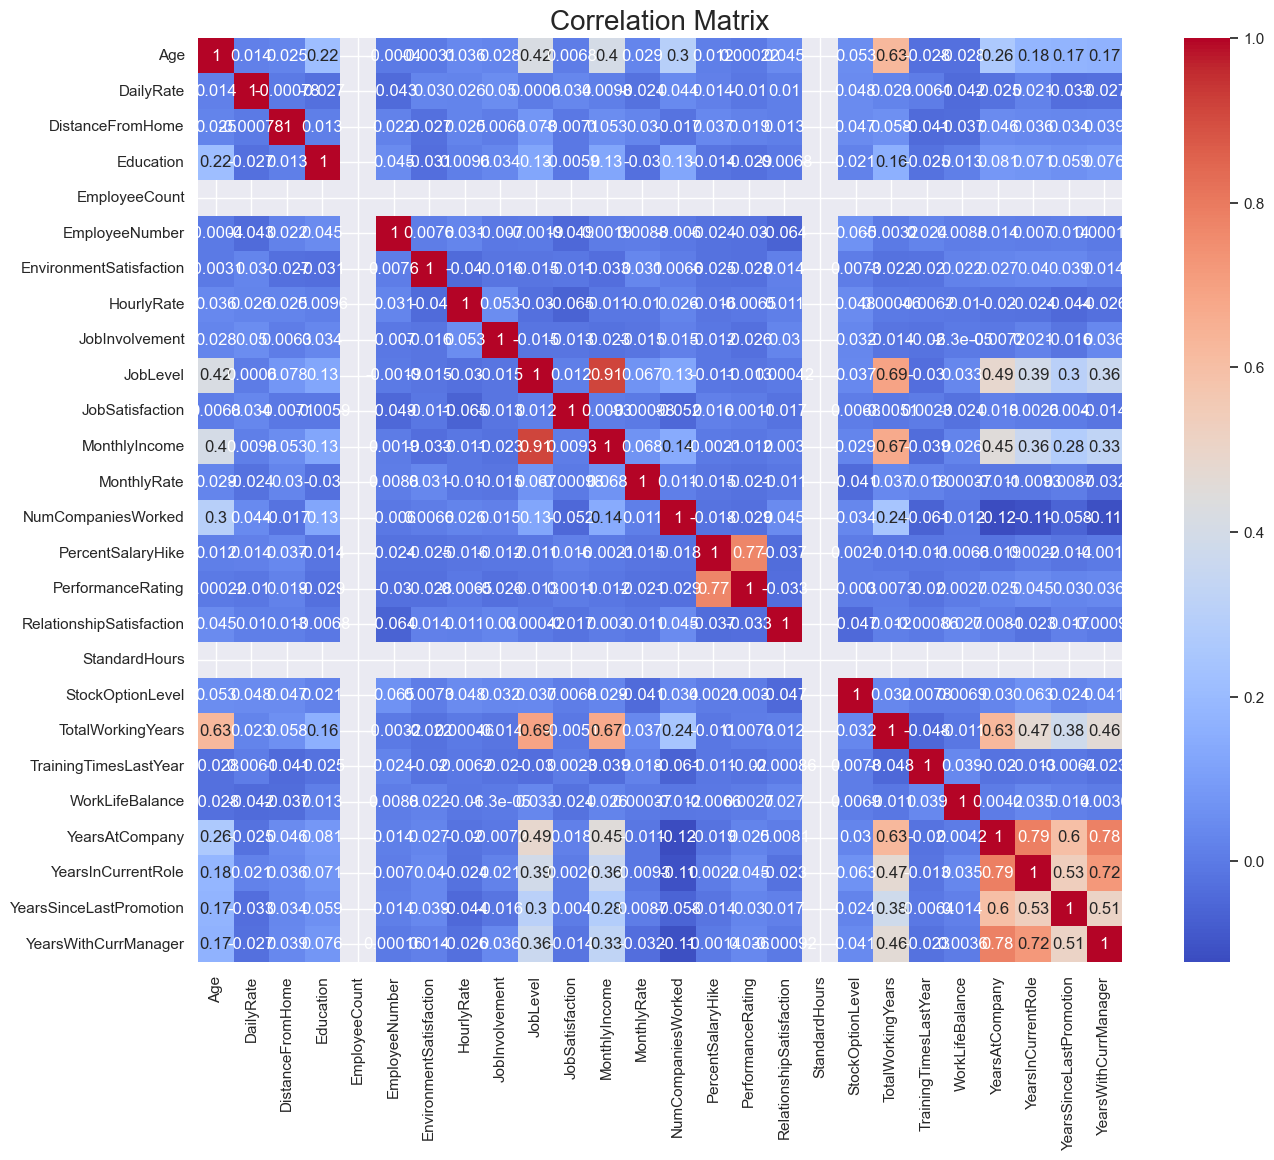

In [83]:
#Correlation Analysis
correlation_matrix=empdata.corr()
plt.figure(figsize=(16, 12))
print("Correlation Matrix")
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',square=True)
plt.title('Correlation Matrix',fontsize=20)
plt.show()

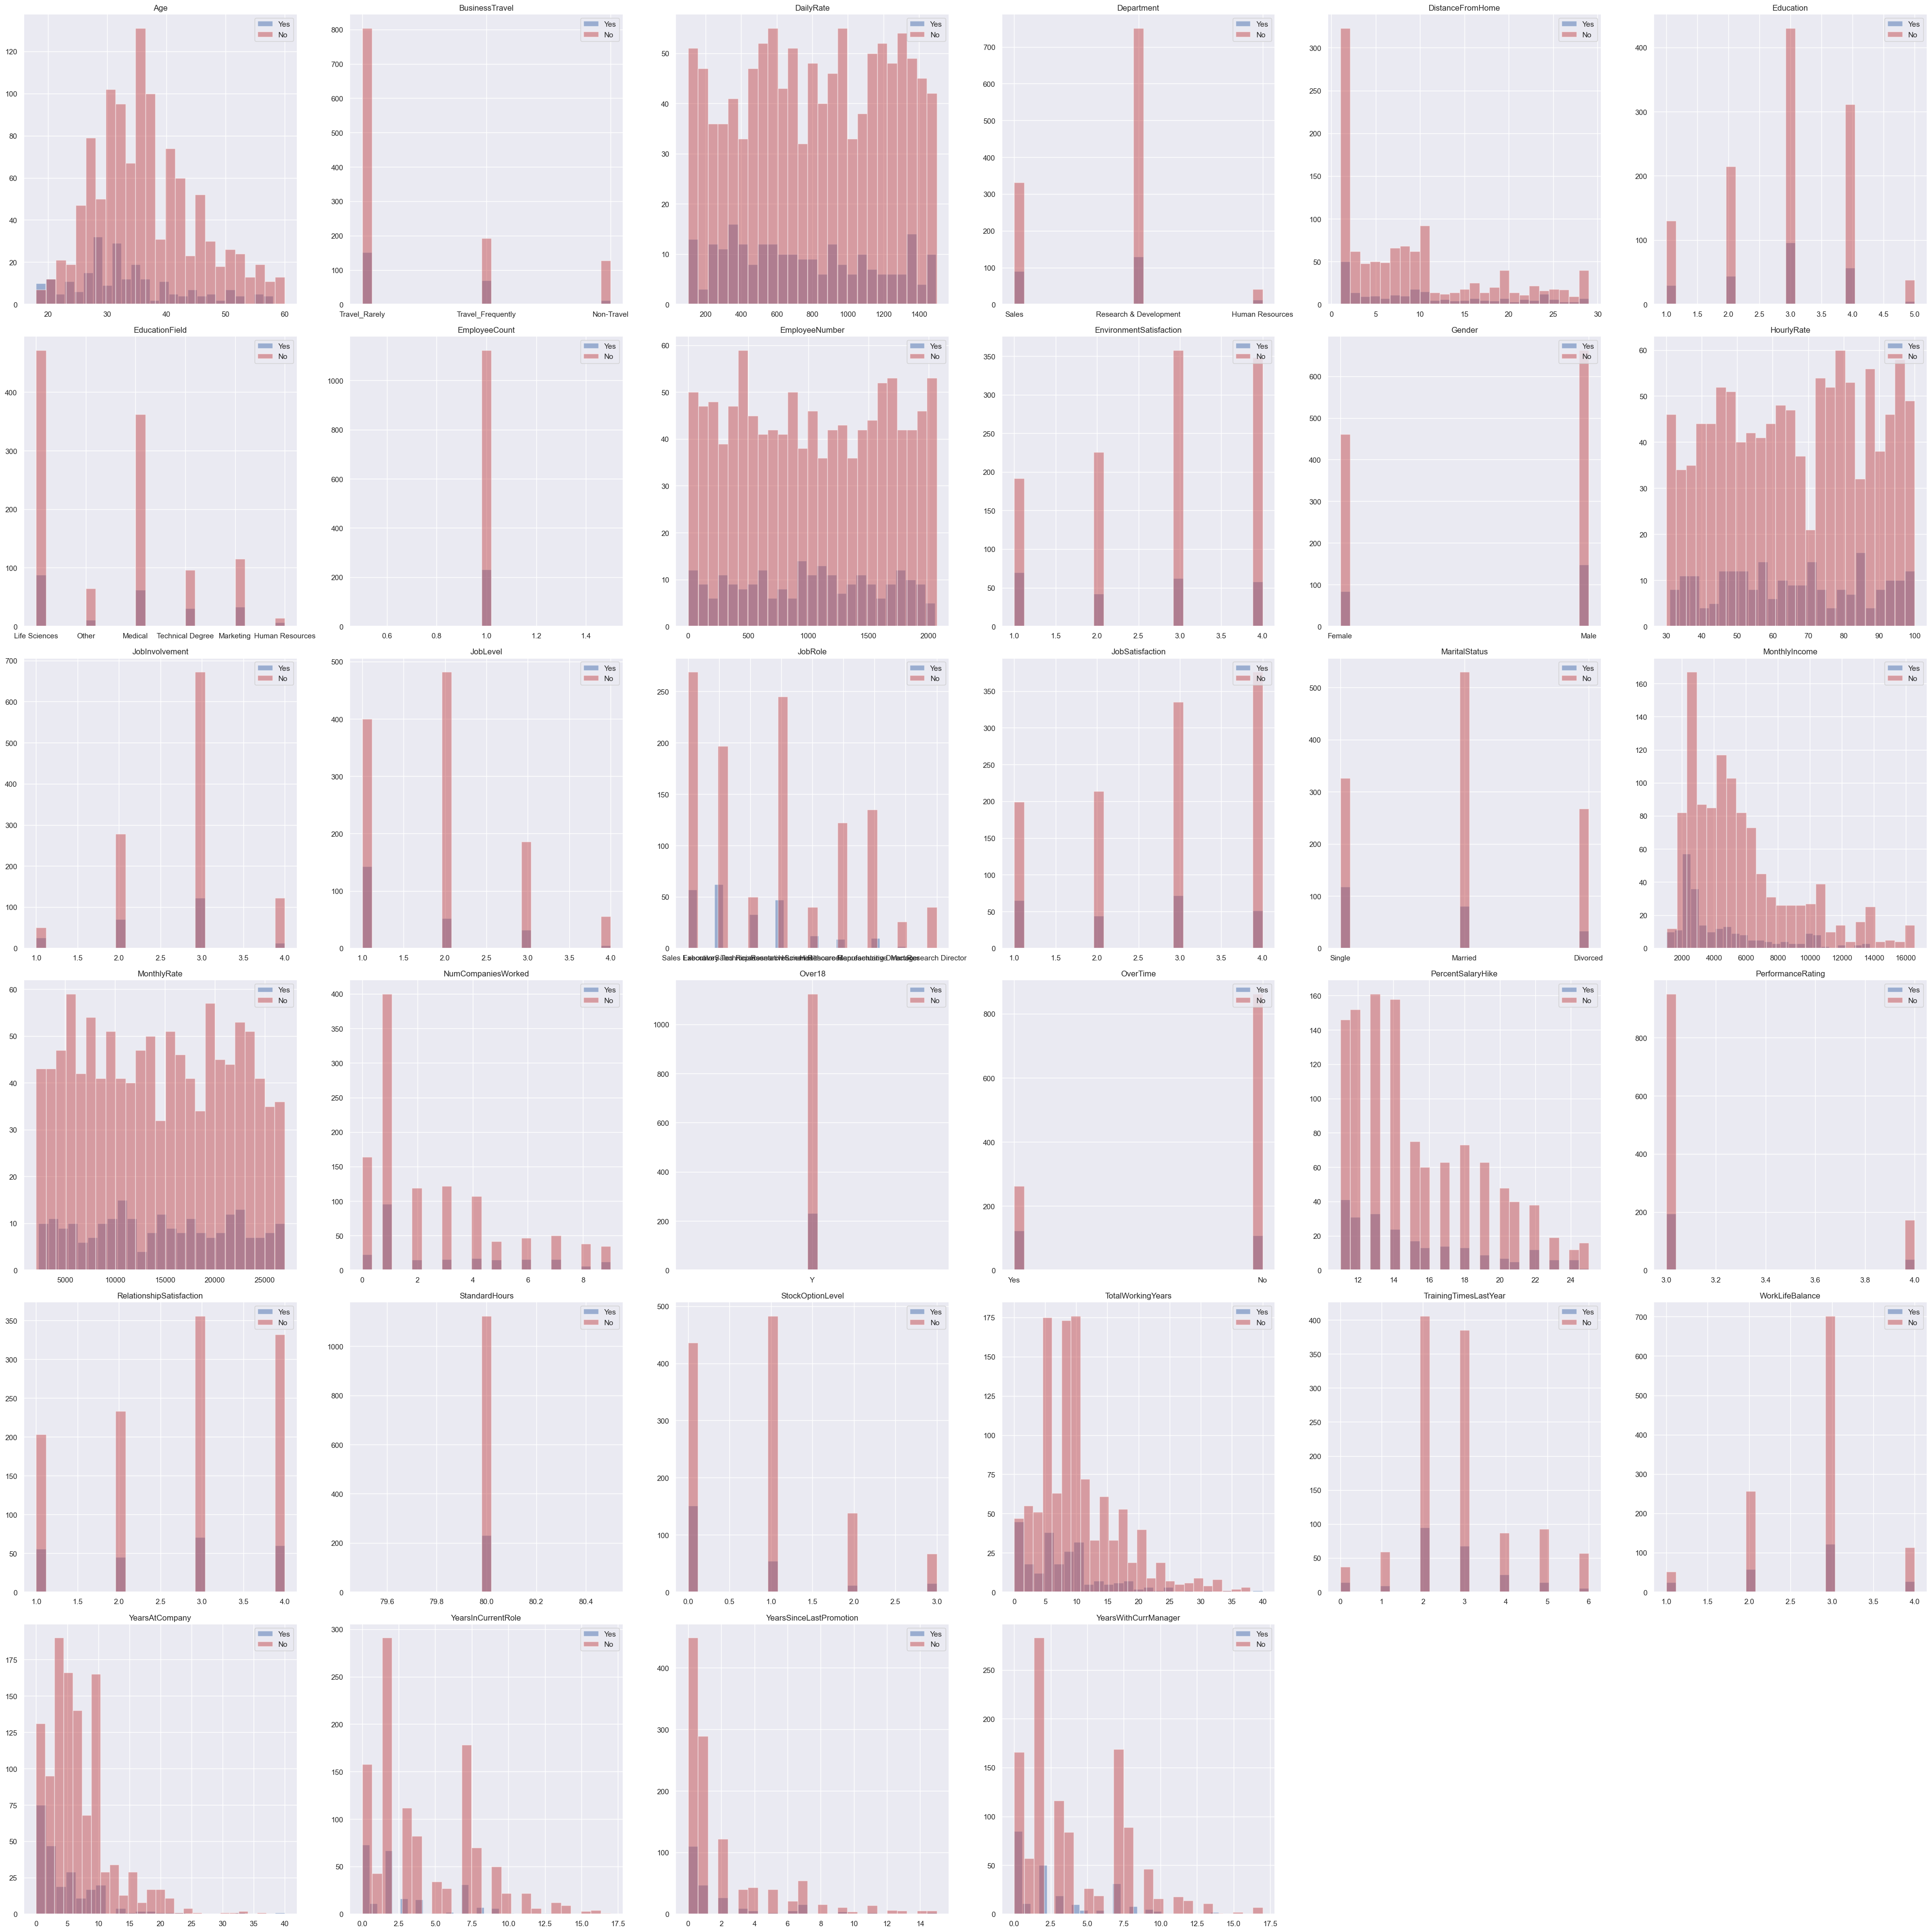

In [84]:
# Distribution Plots for Numerical Features
k = 1
plt.figure(figsize=(40, 40))
for col in empdata.columns:
    if col == "Attrition":
        continue
    yes = empdata[empdata['Attrition'] == 'Yes'][col]
    no = empdata[empdata['Attrition'] == 'No'][col]
    plt.subplot(6, 6, k)
    plt.hist(yes, bins=25, alpha=0.5, label='Yes', color='b')
    plt.hist(no, bins=25, alpha=0.5, label='No', color='r')
    plt.legend(loc='upper right')
    plt.title(col)
    k += 1
plt.tight_layout()
plt.show()

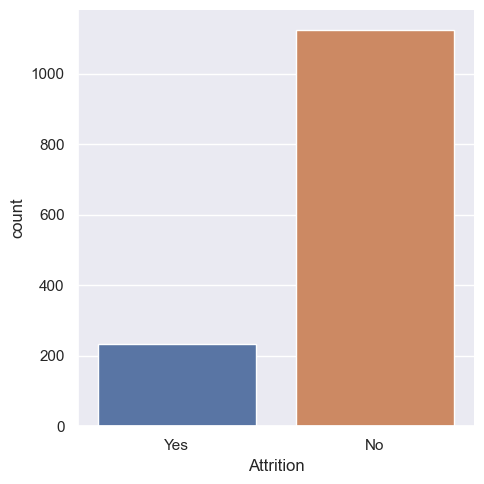

In [85]:
# Attrition Distribution and Stacked Bar Charts
sns.catplot(data=empdata, x="Attrition", kind='count')
plt.show()

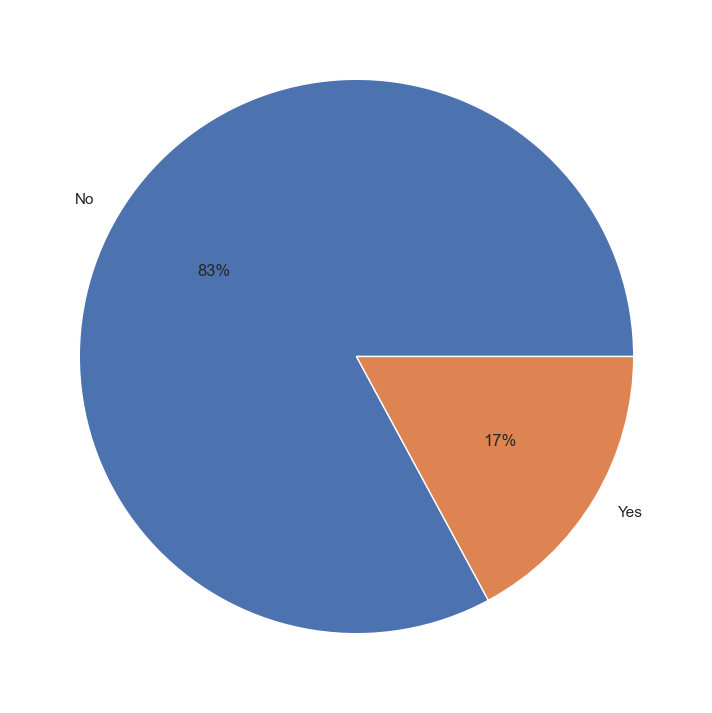

In [86]:
plt.pie(empdata['Attrition'].value_counts(), labels=['No', 'Yes'], autopct='%.0f%%')
plt.show()

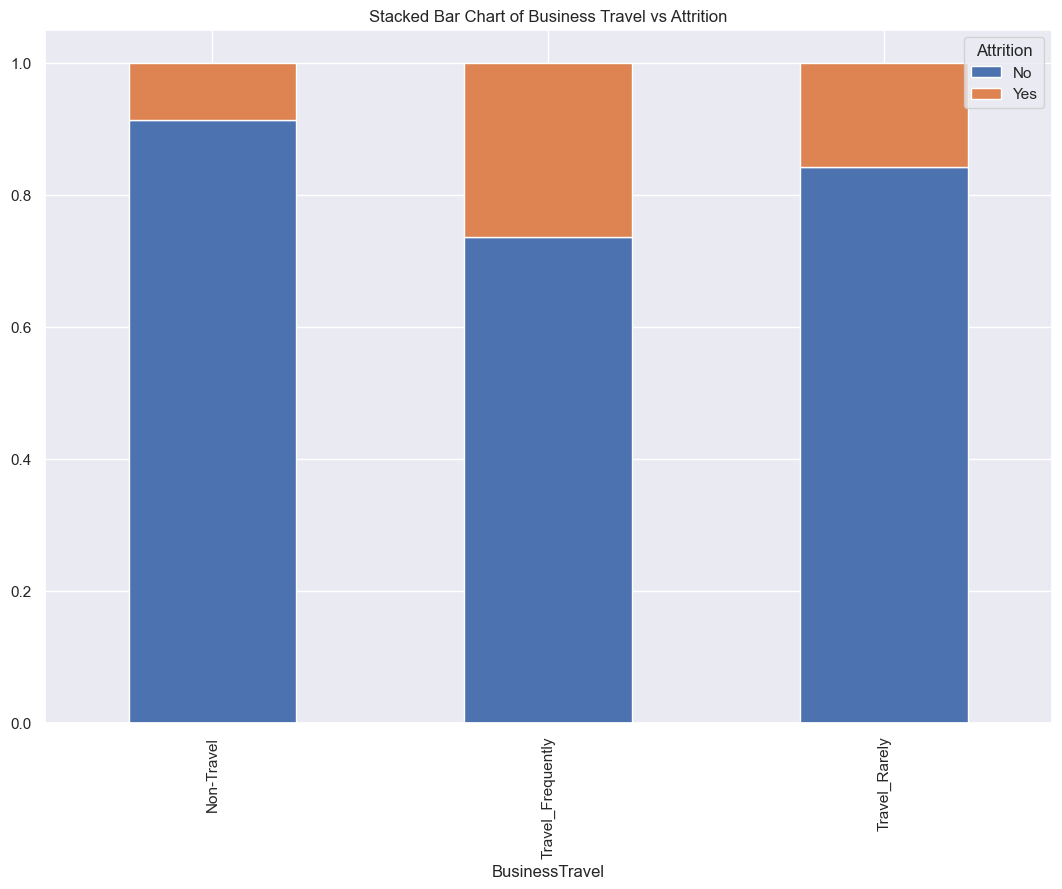

In [87]:
# Stacked Bar Chart of Business Travel vs Attrition
table = pd.crosstab(empdata.BusinessTravel, empdata.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Business Travel vs Attrition')
plt.show()

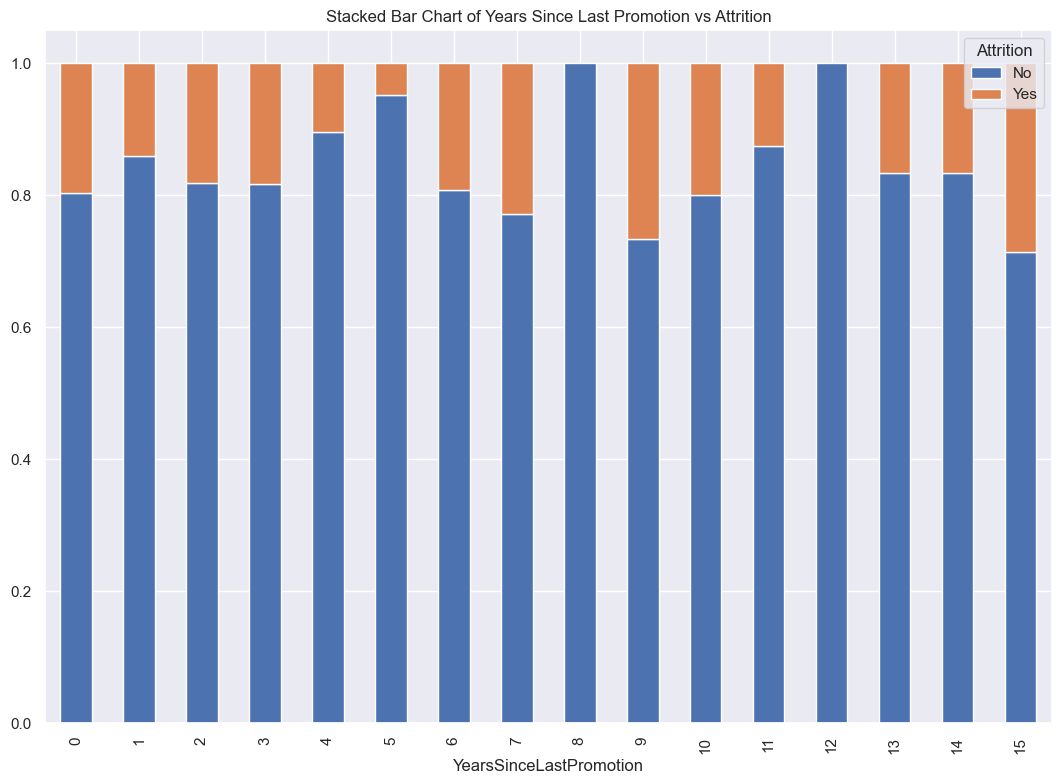

In [88]:
# Stacked Bar Chart of Years Since Last Promotion vs Attrition
table = pd.crosstab(empdata.YearsSinceLastPromotion, empdata.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Years Since Last Promotion vs Attrition')
plt.show()

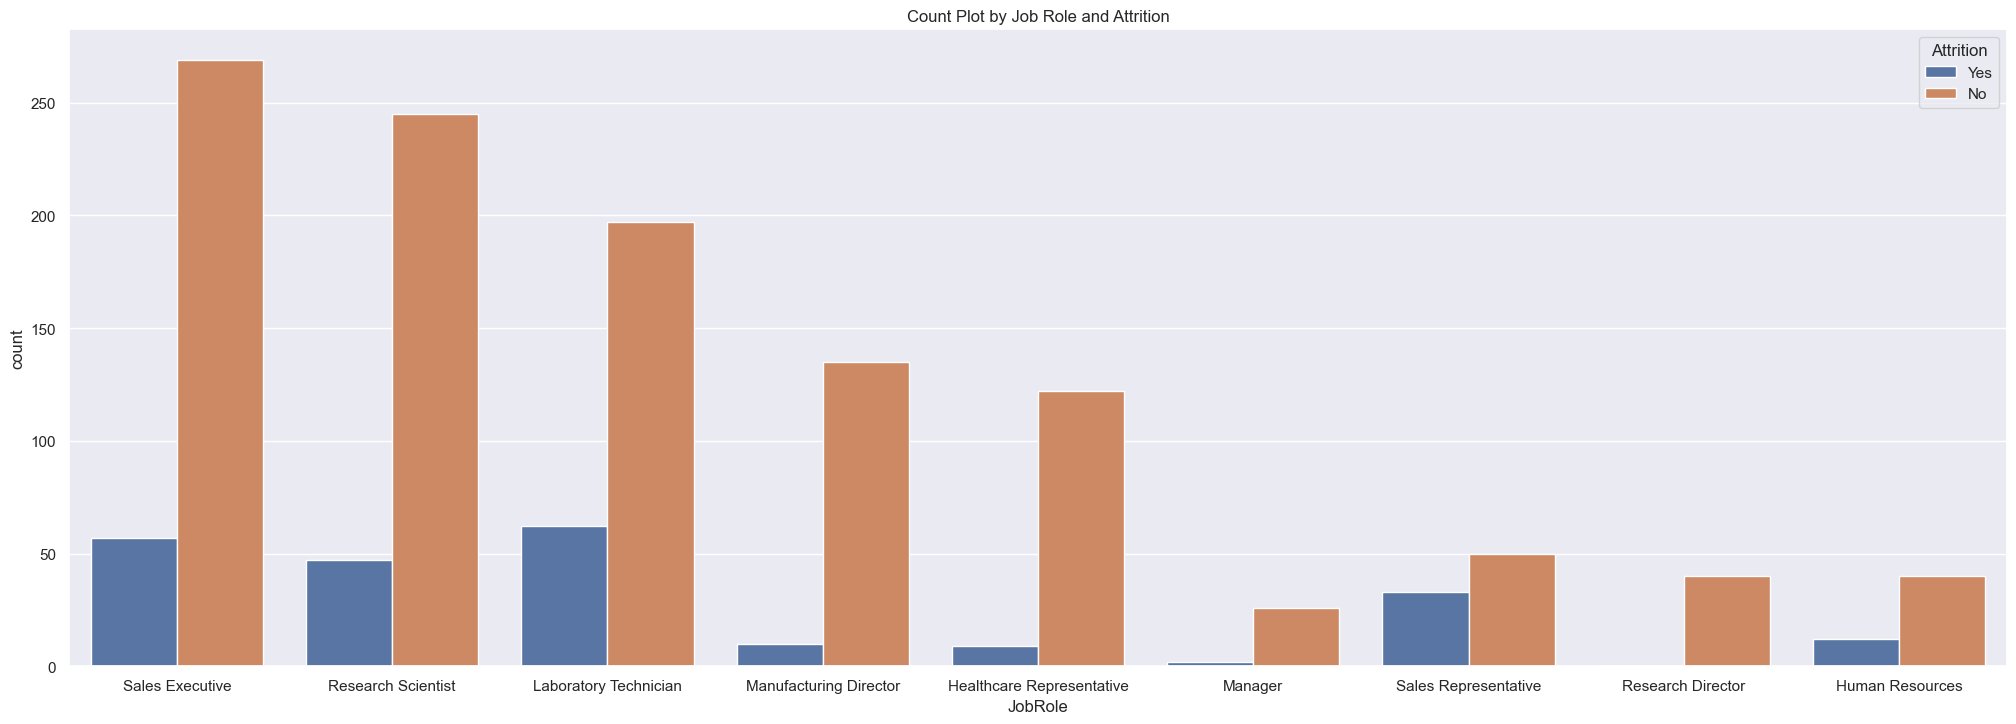

In [89]:
# Count Plot by Job Role and Attrition
a4_dims = (25, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(data=empdata, x="JobRole", hue="Attrition", ax=ax)
plt.title('Count Plot by Job Role and Attrition')
plt.show()

In [90]:
# methods can be used:To Perform t-test to compare 'MonthlyIncome' between employees with and without attrition
from scipy.stats import ttest_ind

attrition_yes = empdata[empdata['Attrition'] == 'Yes']['MonthlyIncome']
attrition_no = empdata[empdata['Attrition'] == 'No']['MonthlyIncome']

t_stat, p_value = ttest_ind(attrition_yes, attrition_no, equal_var=False)
print(f"T-test: t-statistic = {t_stat}, p-value = {p_value}")


T-test: t-statistic = -5.694496934949914, p-value = 2.5526903444747496e-08


#Feature Engineering

In [91]:
#Encode categorical variables and transforming to numerical values
label_encoder = LabelEncoder()
empdata['Attrition']= label_encoder.fit_transform(empdata['Attrition'])
empdata['Gender']=label_encoder.fit_transform(empdata['Gender'])
empdata['OverTime'] = label_encoder.fit_transform(empdata['OverTime'])
empdata['BusinessTravel'] = label_encoder.fit_transform(empdata['BusinessTravel'])
empdata['Department'] = label_encoder.fit_transform(empdata['Department'])
empdata['EducationField'] = label_encoder.fit_transform(empdata['EducationField'])
empdata['JobRole'] = label_encoder.fit_transform(empdata['JobRole'])
empdata['MaritalStatus'] = label_encoder.fit_transform(empdata['MaritalStatus'])

In [92]:
#Feature Scaling
scaler=StandardScaler()
numerical_features=['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
                      'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 
                      'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
                      'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 
                      'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 
                      'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [93]:
empdata[numerical_features] = scaler.fit_transform(empdata[numerical_features])

In [94]:
empdata.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.563466,1,2,0.743224,2,-1.027431,-0.884797,1,1,1,...,-1.573999,80,-0.925401,-0.309371,-2.155555,-2.475870,-0.071015,-0.005829,-0.668359,0.312558
1,1.471981,0,1,-1.297187,1,-0.166218,-1.859439,1,1,2,...,1.200277,80,0.233273,-0.005490,0.155673,0.341822,0.700903,0.872468,-0.327262,0.896344
2,0.109209,1,2,1.415097,1,-0.904400,-0.884797,4,1,4,...,-0.649240,80,-0.925401,-0.461312,0.155673,0.341822,-1.228893,-1.176892,-0.668359,-1.146907
3,-0.345048,0,1,1.462202,1,-0.781370,1.064488,1,1,5,...,0.275518,80,-0.925401,-0.309371,0.155673,0.341822,0.314944,0.872468,0.354932,-1.146907
4,-1.026433,0,2,-0.523665,1,-0.904400,-1.859439,3,1,7,...,1.200277,80,0.233273,-0.613252,0.155673,0.341822,-0.842934,-0.591361,0.013835,-0.563121


#Model Selection

In [95]:
# Preparing Data for Modeling
y = empdata['Attrition']
X = empdata.drop(['EmployeeCount', 'Attrition', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [96]:
# Model Training and Evaluation Function
def train_predict_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test, y_pred))
    print("Recall: ", recall_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

In [97]:
#Initializing  high predictive models
rf_clf = RandomForestClassifier(random_state=42)
train_predict_evaluate(rf_clf, X_train, y_train, X_test, y_test)

Accuracy:  0.8501228501228502
Precision:  0.8
Recall:  0.17142857142857143
Confusion Matrix:
 [[334   3]
 [ 58  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       337
           1       0.80      0.17      0.28        70

    accuracy                           0.85       407
   macro avg       0.83      0.58      0.60       407
weighted avg       0.84      0.85      0.81       407



In [105]:
#Initializing high predictive models

gb_clf = GradientBoostingClassifier(random_state=42)
print("Random Forest Classifier Results:")
train_predict_evaluate(gb_clf, X_train, y_train, X_test, y_test)



Random Forest Classifier Results:
Accuracy:  0.8476658476658476
Precision:  0.625
Recall:  0.2857142857142857
Confusion Matrix:
 [[325  12]
 [ 50  20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       337
           1       0.62      0.29      0.39        70

    accuracy                           0.85       407
   macro avg       0.75      0.63      0.65       407
weighted avg       0.83      0.85      0.82       407



In [108]:
 #K-Fold Cross Validation
def cross_validation(model, X, y):
    scores = cross_validate(model, X, y, cv=5, scoring=('accuracy', 'precision', 'recall', 'f1'))
    print("Accuracy: ", np.mean(scores['test_accuracy']))
    print("Precision: ", np.mean(scores['test_precision']))
    print("Recall: ", np.mean(scores['test_recall']))
    print("F1 Score: ", np.mean(scores['test_f1']))
    


In [110]:
# K-Fold Cross Validation on Random Forest
print("\nRandom Forest K-Fold Cross Validation:")
cross_validation(rf_clf, X, y)


Random Forest K-Fold Cross Validation:
Accuracy:  0.8451296939439981
Precision:  0.7355128205128204
Recall:  0.14662349676225714
F1 Score:  0.24233207470495605


In [101]:
# K-Fold Cross Validation on Gradient Boosting
print("\nGradient Boosting K-Fold Cross Validation:")
cross_validation(gb_clf, X, y)


Gradient Boosting K-Fold Cross Validation:
Accuracy:  0.8562079444323855
Precision:  0.6799552299552301
Recall:  0.3109158186864015
F1 Score:  0.4202358412703946


In [111]:
# Hyperparameter Tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy']
}

In [112]:
grid_search_rf = GridSearchCV(estimator=rf_clf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best parameters for Random Forest: ", grid_search_rf.best_params_)

c:\Users\SuryaKrishna\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.83666945 0.83877471 0.83982735
 0.83561682 0.83666945 0.83877471        nan        nan        nan
 0.83877471 0.84088555 0.84088555 0.83561682 0.83666945 0.83666945
        nan        nan        nan 0.84299081 0.84299638 0.84299081
 0.83772765 0.83983292 0.84088555        nan        nan        nan
 0.84089112 0.84299638 0.84510164 0.84404344 0.84615427 0.84404344
        nan        nan        nan 0.84510721 0.84720691 0.84510164
 0.84720691 0.84299638 0.84720134        nan        nan        nan
 0.83772208 0.83877471 0.83772208 0.83456419 0.83561682 0.83561682
        nan        nan        nan 0.83772208 0.83983292 0.83878028
 0.83561682 0.83561682 0.83878028        nan        nan        nan
 0.83878585 0.83772765 0.83983292 0.83983292 0.83983292 0.84299081
        nan    

Best parameters for Random Forest:  {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300}


In [113]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5, 6]
}

In [114]:
grid_search_gb = GridSearchCV(estimator=gb_clf, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", grid_search_gb.best_params_)


Best parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}


In [115]:
# Feature Importance from Random Forest
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

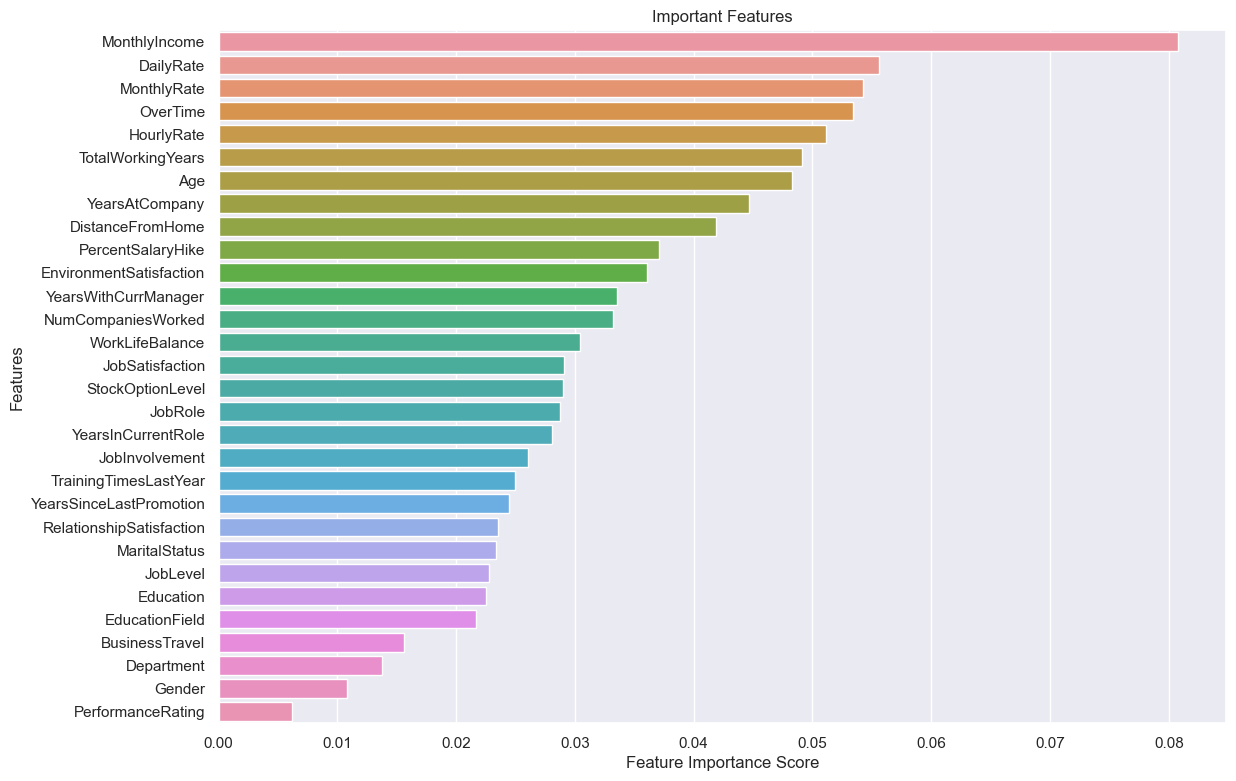

In [103]:
feature_imp = pd.Series(rf_clf.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
sns.set(rc={'figure.figsize':(13,9)})
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()